# Solving Linear Programming Models
## Mehmet Gönen
## October 31, 2022

In [1]:
# load libraries
import numpy as np
import scipy.sparse as sp

import cplex as cp

In [2]:
def linear_programming(direction, A, senses, b, c, l, u):
    # create an empty optimization problem
    prob = cp.Cplex()

    # add decision variables to the problem including their coefficients in objective and ranges
    prob.variables.add(obj = c.tolist(), lb = l.tolist(), ub = u.tolist())

    # define problem type
    if direction == "maximize":
        prob.objective.set_sense(prob.objective.sense.maximize)
    else:
        prob.objective.set_sense(prob.objective.sense.minimize)

    # add constraints to the problem including their directions and right-hand side values
    prob.linear_constraints.add(senses = senses.tolist(), rhs = b.tolist())

    # add coefficients for each constraint
    row_indices, col_indices = A.nonzero()
    prob.linear_constraints.set_coefficients(zip(row_indices.tolist(),
                                                 col_indices.tolist(),
                                                 A.data.tolist()))

    # solve the problem
    prob.solve()

    # check the solution status
    print(prob.solution.get_status())
    print(prob.solution.status[prob.solution.get_status()])

    # get the solution
    x_star = prob.solution.get_values()
    obj_star = prob.solution.get_objective_value()

    return(x_star, obj_star)

## The maximal flow problem
For the maximal flow problem, we wish to send as much material as possible from a specified node $s$ in a network, called the source, to another specified node $t$, called the sink. No costs are associated with flow. If $v$ denotes the amount of material sent from node $s$ to node $t$ and $x_{ij}$ denotes the flow from node $i$ to node $j$ over arc $i-j$ the formulation is:

\begin{align*}
\mbox{maximize} \;\;& v \\
\mbox{subject to:} \;\;& \sum\limits_{j} x_{ij} - \sum\limits_{k} x_{ki} = 
\begin{cases} v & \textrm{if $i = s$ (source)}\\
-v & \textrm{if $i = t$ (target)}\\
0 & \textrm{otherwise}\end{cases} \\
\;\;& 0 \leq x_{ij} \leq u_{ij} \;\;\;\; \textrm{for all arcs $i-j$ in the network.}
\end{align*}

\begin{align*}
\mbox{maximize} \;\;& v \\
\mbox{subject to:} \;\;& + x_{12} + x_{13} \phantom{+ x_{24} + x_{25} + x_{34} + x_{35} + x_{46} + x_{56}\:\:} = v\\
\;\;& - x_{12} \phantom{+ x_{13}\:\:} + x_{24} + x_{25} \phantom{+ x_{34} + x_{35} + x_{46} + x_{56}\:\:} = 0\\
\;\;& \phantom{+ x_{12}\:\:} - x_{13} \phantom{+ x_{24} + x_{25}\:\:} + x_{34} + x_{35} \phantom{+ x_{46} + x_{56}\:\:} = 0\\
\;\;& \phantom{+ x_{12} + x_{13}\:\:} - x_{24} \phantom{+ x_{25}\:\:} - x_{34} \phantom{+ x_{35}\:\:} + x_{46} \phantom{+ x_{56}\:\:} = 0\\
\;\;& \phantom{+ x_{12} + x_{13} + x_{24}\:\:} - x_{25} \phantom{+ x_{34}\:\:} - x_{35} \phantom{+ x_{46}\:\:} + x_{56} = 0\\
\;\;& \phantom{+ x_{12} + x_{13} + x_{24} + x_{25} + x_{34} + x_{35}\:\:} - x_{46} - x_{56} = -v\\
\;\;& 0 \leq x_{12} \leq 2\\
\;\;& 0 \leq x_{13} \leq 8\\
\;\;& 0 \leq x_{24} \leq 3\\
\;\;& 0 \leq x_{25} \leq 4\\
\;\;& 0 \leq x_{34} \leq 4\\
\;\;& 0 \leq x_{35} \leq 2\\
\;\;& 0 \leq x_{46} \leq 1\\
\;\;& 0 \leq x_{56} \leq 5
\end{align*}

As usual, the summations are taken only over the arcs in the network. Also, the upper bound $u_{ij}$ for the flow on arc $i-j$ is taken to be $+\infty$ if arc $i-j$ has unlimited capacity. The interpretation is that $v$ units are supplied at $s$ and consumed at $t$.

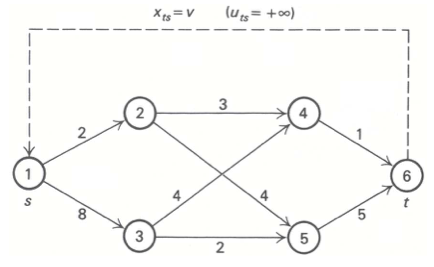

Let us introduce a fictitious arc $t-s$ with unlimited capacity; that is, $u_{ts} = +\infty$. Now $x_{ts}$ represents the variable $v$, since $x_{ts}$ simply returns the $v$ units of flow from node $t$ back to node $s$, and no formal external supply of material occurs. With the introduction of the arc $t-s$, the problem assumes the following special form of the general network problem:

\begin{align*}
\mbox{maximize} \;\;& x_{ts} \\
\mbox{subject to:} \;\;& \sum\limits_{j} x_{ij} - \sum\limits_{k} x_{ki} = 0 \;\;\;\; i = 1, 2, \dots, n\\
\;\;& 0 \leq x_{ij} \leq u_{ij} \;\;\;\; \textrm{for all arcs $i-j$ in the network.}
\end{align*}

\begin{align*}
\mbox{maximize} \;\;& x_{61} \\
\mbox{subject to:} \;\;& + x_{12} + x_{13} \phantom{+ x_{24} + x_{25} + x_{34} + x_{35} + x_{46} + x_{56}\:\:} -x_{61} = 0\\
\;\;& - x_{12} \phantom{+ x_{13}\:\:} + x_{24} + x_{25} \phantom{+ x_{34} + x_{35} + x_{46} + x_{56} + x_{61}\:\:} = 0\\
\;\;& \phantom{+ x_{12}\:\:} - x_{13} \phantom{+ x_{24} + x_{25}\:\:} + x_{34} + x_{35} \phantom{+ x_{46} + x_{56} + x_{61}\:\:} = 0\\
\;\;& \phantom{+ x_{12} + x_{13}\:\:} - x_{24} \phantom{+ x_{25}\:\:} - x_{34} \phantom{+ x_{35}\:\:} + x_{46} \phantom{+ x_{56} + x_{61}\:\:} = 0\\
\;\;& \phantom{+ x_{12} + x_{13} + x_{24}\:\:} - x_{25} \phantom{+ x_{34}\:\:} - x_{35} \phantom{+ x_{46}\:\:} + x_{56} \phantom{+ x_{61}\:\:} = 0\\
\;\;& \phantom{+ x_{12} + x_{13} + x_{24} + x_{25} + x_{34} + x_{35}\:\:} - x_{46} - x_{56} + x_{61} = 0\\
\;\;& 0 \leq x_{12} \leq 2\\
\;\;& 0 \leq x_{13} \leq 8\\
\;\;& 0 \leq x_{24} \leq 3\\
\;\;& 0 \leq x_{25} \leq 4\\
\;\;& 0 \leq x_{34} \leq 4\\
\;\;& 0 \leq x_{35} \leq 2\\
\;\;& 0 \leq x_{46} \leq 1\\
\;\;& 0 \leq x_{56} \leq 5\\
\;\;& 0 \leq x_{61} \leq \infty
\end{align*}

[[ 1.  1.  0.  0.  0.  0.  0.  0. -1.]
 [-1.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  1.  1.  0.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  1.  0.  0.]
 [ 0.  0.  0. -1.  0. -1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0. -1. -1.  1.]]


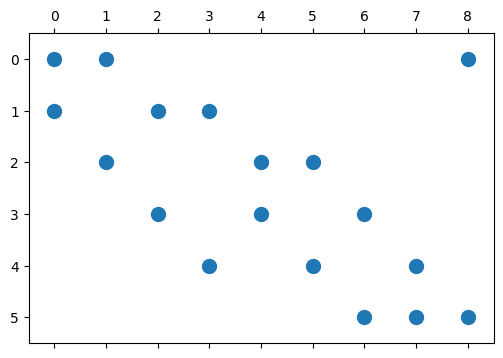

In [3]:
names = np.array(["x_1_2", "x_1_3", "x_2_4", "x_2_5", "x_3_4", "x_3_5", "x_4_6", "x_5_6", "x_6_1"])
c = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1.0])
senses = np.repeat("E", 6)
b = np.repeat(0, 6)
l = np.repeat(0, 9)
u = np.array([2, 8, 3, 4, 4, 2, 1, 5, cp.infinity])

A = np.zeros((6, 9))
# node 1
A[0, 0] = 1
A[0, 1] = 1
A[0, 8] = -1
# node 2
A[1, 0] = -1
A[1, 2] = 1
A[1, 3] = 1
# node 3
A[2, 1] = -1
A[2, 4] = 1
A[2, 5] = 1
# node 4
A[3, 2] = -1
A[3, 4] = -1
A[3, 6] = 1
# node 5
A[4, 3] = -1
A[4, 5] = -1
A[4, 7] = 1
# node 6
A[5, 6] = -1
A[5, 7] = -1
A[5, 8] = 1

print(A)
A = sp.csr_matrix(A)

import matplotlib.pyplot as plt
plt.figure(figsize = (6, 9))
plt.spy(A, marker = "o")
plt.show()

In [4]:
x_star, obj_star = linear_programming("maximize", A, senses, b, c, l, u)
print(names)
print(x_star)
print(obj_star)

Version identifier: 20.1.0.1 | 2022-01-05 | 9df5e5246
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 1 rows and 1 columns.
Aggregator did 2 substitutions.
Reduced LP has 3 rows, 6 columns, and 8 nonzeros.
Presolve time = 0.00 sec. (0.01 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual infeasibility =             0.000000
1
optimal
['x_1_2' 'x_1_3' 'x_2_4' 'x_2_5' 'x_3_4' 'x_3_5' 'x_4_6' 'x_5_6' 'x_6_1']
[2.0, 3.0, 0.0, 2.0, 1.0, 2.0, 1.0, 4.0, 5.0]
5.0


In [5]:
def maximum_flow_problem(filename):
    # read problem instance from file
    problem = np.loadtxt(filename)

    # add an edge between target and source
    V = np.max(problem[:,range(2)].astype(int))
    problem = np.vstack((problem, [V, 1, np.sum(problem[:,2])]))

    E = problem.shape[0]

    c = np.concatenate((np.repeat(0, E - 1), [1]))
    senses = np.repeat("E", V)
    b = np.repeat(0, V)
    l = np.repeat(0, E)
    u = np.array(problem[:,2])

    aij = np.repeat([+1.0, -1.0], repeats = E)
    row = np.concatenate((problem[:,0].astype(int) - 1, problem[:,1].astype(int) - 1))
    col = np.concatenate((range(E), range(E)))
    A = sp.csr_matrix((aij, (row, col)), shape = (V, E))

    x_star, obj_star = linear_programming("maximize", A, senses, b, c, l, u)
    return(x_star, obj_star)

In [6]:
x_star, obj_star = maximum_flow_problem("maximal_flow_problem1.txt")
print(x_star)
print(obj_star)

Version identifier: 20.1.0.1 | 2022-01-05 | 9df5e5246
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 1 rows and 1 columns.
Aggregator did 2 substitutions.
Reduced LP has 3 rows, 6 columns, and 8 nonzeros.
Presolve time = 0.00 sec. (0.01 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual infeasibility =             0.000000
1
optimal
[2.0, 3.0, 0.0, 2.0, 1.0, 2.0, 1.0, 4.0, 5.0]
5.0


In [7]:
V = 100
P = np.random.rand(V, V)
P = np.triu(P, 1)

row_indices, col_indices = (P > 0.8).nonzero()

E = len(row_indices)

problem = np.vstack((row_indices + 1, col_indices + 1,
                     np.random.randint(2, 10, size = E))).T.astype(int)

np.savetxt("maximal_flow_problem2.txt", problem, fmt = "%d")

x_star, obj_star = maximum_flow_problem("maximal_flow_problem2.txt")
print(x_star)
print(obj_star)

Version identifier: 20.1.0.1 | 2022-01-05 | 9df5e5246
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 15 rows and 238 columns.
Aggregator did 2 substitutions.
Reduced LP has 83 rows, 749 columns, and 1459 nonzeros.
Presolve time = 0.00 sec. (0.90 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =            83.000000
Iteration:    62   Dual objective     =            81.000000
Perturbation started.
Iteration:   102   Dual objective     =            81.000000
Iteration:   164   Dual objective     =            78.999966
Removing perturbation.
1
optimal
[2.0, 9.0, 7.0, 8.0, 6.0, 6.0, 8.0, 3.0, 2.0, 7.0, 4.0, 4.0, 3.0, 2.0, 2.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0